In [1]:
using Plots
using LaTeXStrings
using Printf
using DifferentialEquations

In [2]:
default(lw=2,markersize = 6,
    xtickfont=font(12), ytickfont=font(12), 
    guidefont=font(14), legendfont=font(12),titlefont=font(12))

# Stability

Consider the scalar problem
$$
u' =\lambda u, \quad \lambda <0
$$
and suppose we use Euler on this with a large time step:

In [39]:
function f(u, p, t)
    λ = p[1];

    return λ * u
    
end

u0 = 1.0;
tspan = (0., 10.)
p = [-3.0];

prob = ODEProblem(f, u0, tspan, p); # define the problem


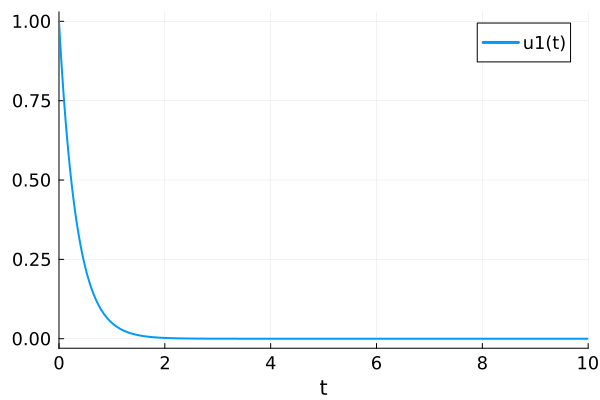

In [40]:
soln = solve(prob) # This is the expected behavior
plot(soln)

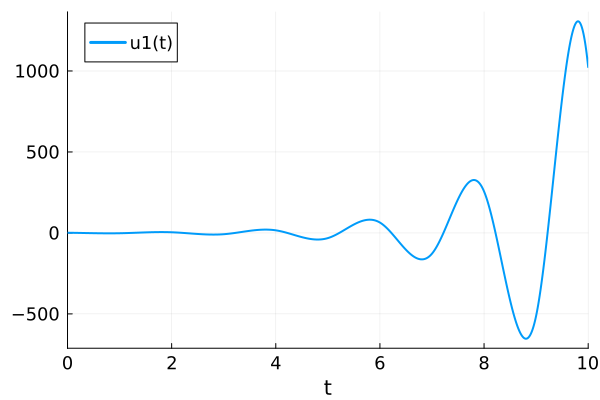

In [43]:
soln = solve(prob,  dt = 0.1, Euler()) # slowly increase dt
plot(soln)

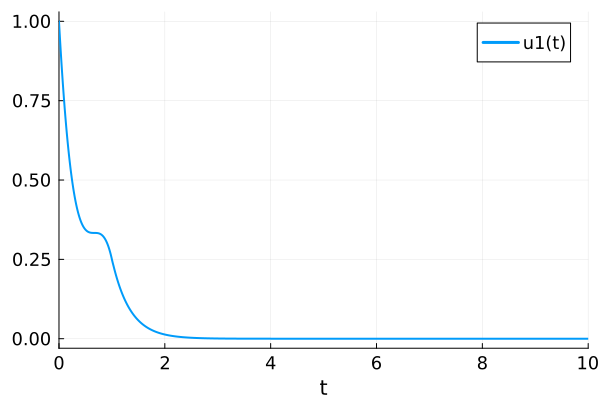

In [44]:
soln = solve(prob,  dt = 0.1, ImplicitEuler()) # slowly increase dt
plot(soln)

# Energy Conservation

In [49]:
A = [0 1; -1 0];
function linear!(du, u, p, t)
    du .= A*u;
    du
end

linear! (generic function with 1 method)

In [50]:
u0 = [1.0, -1.0];
tspan = (0., 100.)
p = [];

prob = ODEProblem(linear!, u0, tspan); # define the problem

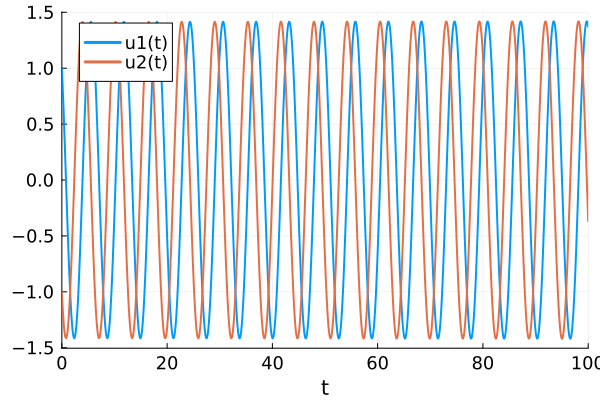

In [51]:
soln = solve(prob) # what we expect
plot(soln)

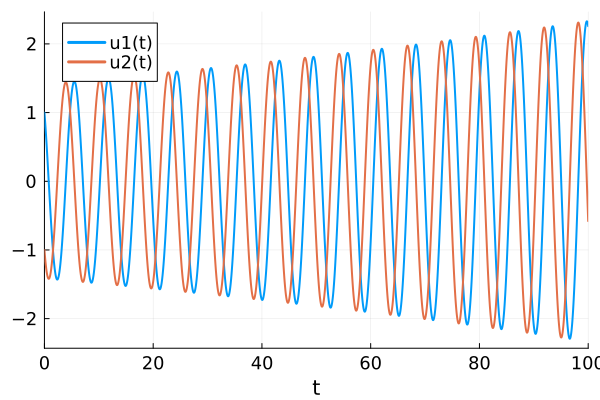

In [52]:
soln = solve(prob,  dt = 0.01, Euler()) # slowly increase tspan
plot(soln)

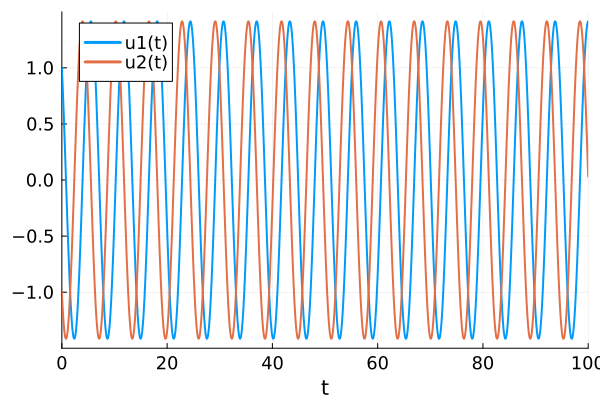

In [53]:
soln = solve(prob,  dt = 0.01, Trapezoid()) # slowly increase tspan
plot(soln)